In [17]:
import numpy as np
import scipy.stats
import scipy.optimize
import matplotlib.pyplot as plt

# iPython magic command for inline figures. If this command is not given, figures are generated in windows.
# An asterisk appears in the cell prompt (i.e. "In [*]:"), and the kernel stalls until the window is closed.
%matplotlib inline

## Below are two simple examples of exception handling

## Try to import pandas. If not existent, set flag = False, and raise an exception.
try:
    import pandas as pd
    pd_flag = True
except ImportError:
    print("Package pandas not found. Cannot do funky data structures!")
    pd_flag = False
    
## Try to import seaborn.
try:
    import seaborn as sns
    sns_flag = True
    sns.set_style("whitegrid")
    sns.set_style("ticks")
except ImportError:
    sns_flag = False
print("Does seaborn exist on the computer? " + str(sns_flag))

Does seaborn exist on the computer? True


## Random Variables

### Random number generation in Python

Python random number generators work in much the same way as random number generators in other programming languages: the numbers generated are actually <i>pseudo-random</i>, with the sequence of numbers generated dependent on the initial "seed".  If the seed isn't already specified (usually the case if you don't want to regenerate the same sequence of random numbers), then on most systems (e.g. linux, MacOSX) it is taken from a special system file `/dev/random` which is continually updated with a value generated from system noise produced by inputs from device drivers (e.g. measurements of time between keystrokes).  As such it is thought to be a <i>true</i> random variable since it is generated by sequences of physical events which, in combination, are thought to be random, but there is still much debate about this (e.g. see https://en.wikipedia.org/wiki//dev/random for discussion and further links).  In some systems the seed may be generated from something less-demonstrably random, such as the system clock.

In some situations you may want to set the starting seed value yourself, in order to produce the same sequence of random numbers.  This can be done using the `numpy.random.seed` function.  Let's see how this works using the `random.choice` function as an example:

In [18]:
## First let's set things up to generate a sequence of random choice draws representing the toss of a coin:
## First set up a list to sample from via random choice, which represents the set of the two possible 
## outcomes, 'heads' and 'tails':
omega = ["tails","heads"]

## If we want to fix the random seed to a pre-set value, which needs to be a positive integer
np.random.seed(4)

## Now generate a sequence of 10 coin tosses and print it out
throws = np.random.choice(omega, size=10, replace=True)
print throws

## Now repeat to compare the sequence with or without the same random seed:
np.random.seed(4)  #Uncomment this to reset the seed

throws = np.random.choice(omega, size=10, replace=True)
print throws

## You can see that if the seed is set to the same value as before, we get the same sequence.  

['tails' 'tails' 'heads' 'heads' 'heads' 'tails' 'heads' 'tails' 'tails'
 'heads']
['tails' 'tails' 'heads' 'heads' 'heads' 'tails' 'heads' 'tails' 'tails'
 'heads']


It's important to bear in mind that setting the seed will set the entire sequence of random numbers generated, not only in the first instance that a set of random numbers are generated, but also subsequently within the same sequence of code (i.e. further down the notebook).  For most applications you do not need to generate the same sequence - in fact in many cases (e.g. repeated Monte Carlo simulations) you precisely don't want to do this.  Therefore you should be careful about pre-setting the seed.  In order to make the seed go back to the default random system value, you can call `numpy.random.seed` again with no argument, which we do here.  From this point in the notebook onwards, the notebook will generate a different random sequence every time it is run.

In [19]:
np.random.seed()

### Simulating repeated Bernoulli trials

Simulating the process of picking sweets of two colours, or anything else that can be classified in terms of success and failure, can be easily done using NumPy’s `random.choice` function, which we introduced in the previous tutorial. In the code that follows, `n` defines the number of draws per sample (e.g. drawing five sweets out of the bag) and `nsims` the number of simulated samples. Looping over `nsims`, we can then make a list (`samp`) containing <i>red</i> and <i>green</i> by sampling from the list `omega`. We assign a sample size to the `random.choice` function call, `size=n`, and in this example set the probabilities of picking <i>red</i> or <i>green</i> to 0.6 and 0.4, respectively. Note that these probabilities need to add up to 1.0! By sampling with replacement, we ensure that we can draw repeatedly, and that the probability of getting either <i>red</i> or <i>green</i> stays the same.

The expression `[samp == "red"]` produces a list of `True` and `False` values, based on whether a given element in the sample is <i>red</i> or <i>green</i> (you can check this by printing this expression!). The function `np.sum()` turns `True` and `False` into 1 and 0 respectively, such that it is possible to sum up the list. The resulting value corresponds to the number of <i>red</i> sweets in the sample.

In [20]:
omega = ["red", "green"]
n=5; nsims = 1000
xsims = []
for i in range(nsims):
    samp = np.random.choice(omega, size=n, p=[0.6, 0.4], replace=True)
    xsims.append(np.sum([samp == "red"]))    

### The binomial distribution emerges

We can now make a histogram from the results of all our Bernoulli trials, and compare it to the pmf (<i>probability mass function</i> - remember this is an integer so it is not called a probability density function!) of the binomial distribution itself, which can be produced by a function in `scipy.stats`. Try changing the sample size from small to large and observe the changes as the simulated distribution converges on the theoretical distribution.

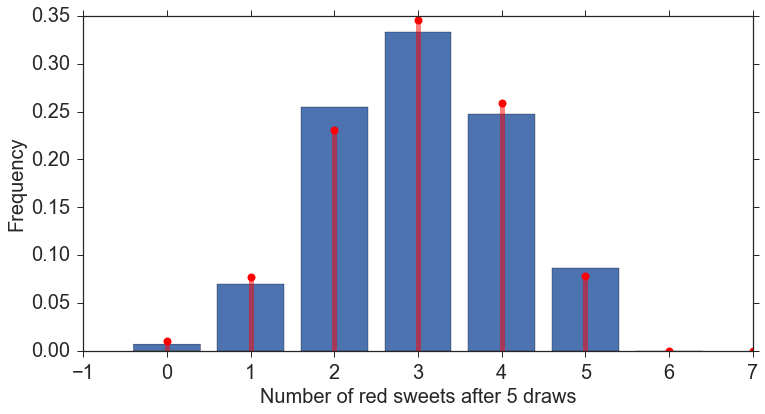

In [21]:
fig, ax1 = plt.subplots(1,figsize=(12,6))
## histogram of the samples from box above.  To make it clear that the binned variable is not continuous, we can
## change some of the settings: rwidth sets the width of the bars so they do not appear contiguous, while align
## sets the centre of the bar to lie on the left edge, middle or right edge of a bin.  Note that the histogram
## binning is set so that the first bin runs from 0 to 1.0 (exclusive), then 1-2, 3-4 etc. so the actually value
## of the bin corresponds to the left edge of the bin in this case.
h, bins, patches = ax1.hist(xsims, bins=np.arange(0., (np.max(xsims)*1.5), 1.0), normed=True,
                            rwidth=0.8, align='left')

## Now let's overplot the binomial distribution for the same parameter:
p = 0.6 ### probability of red sweets
## define binomial distribution for a given sample size n
## and probability p; "freezes" distribution
b = scipy.stats.binom(n,p)
x = np.arange(0.0,(np.max(xsims)*1.5),1.0) ## x-axis

##  Now plot...
ax1.plot(x, b.pmf(x), 'ro', ms=8) ## plot probability mass function for points in x
## For clarity we will plot the theoretical distribution using vertical bars.
ax1.vlines(x, 0, b.pmf(x), colors='r', lw=5, alpha=0.5)
# Here we automatically generate the x axis label to be appropriate for the setup:
xlab = "Number of red sweets after %i draws" % n
ax1.set_xlabel(xlab, fontsize=20)
ax1.set_ylabel("Frequency", fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
plt.show()

### Probability distributions: generating random numbers with numpy

For simply sampling from a probability distribution, `numpy.random` does a great job. We’ve already met `numpy.random.choice` above, but there’s more. There are various ways to sample from a uniform distribution, as well as from various common distributions. Have a look at the documentation for details, and play with the code below. You can make histograms for any of these distributions and compare them.  In some cases you will need to specify the parameters for a distribution in the function call, but not in all. You should make sure you understand the parameters by comparing with the equation for the distribution given in the Lecture slides.  As an example, we start with the normal distribution:

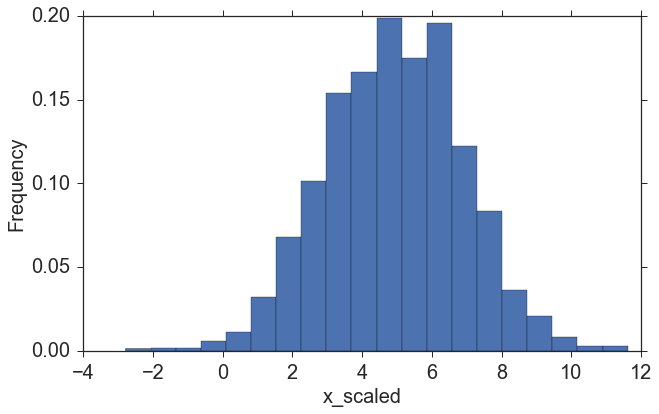

In [22]:
x = np.random.randn(10) ## 10 numbers from a standard normal distribution.  
## Remember that the standard normal is defined to have mean = 0.0 and standard deviation = 1.0
## Now let's generate a standard normal with mean = 5.0 and standard deviation = 2.0
## We can do this by scaling the numbers from the standard normal to get the right standard deviation
## and adding a constant offset to produce the right mean.
sigma = 2.0
mu = 5.0
x_scaled = np.random.randn(10)*sigma + mu ## 10 numbers from a normal distribution with mean = 5 and s.d.=2

## Now lets generate 1000 values and plot the distribution using a histogram:
## Set up plot window
x_scaled = np.random.randn(1000)*sigma + mu

fig, ax1 = plt.subplots(1,1,figsize=(10,6))
## Make histogram
counts, edges, patches = ax1.hist(x_scaled, bins=20, range=[np.min(x_scaled), np.max(x_scaled)], normed=True)
## Note that here the binned variable is continuous, so we don't plot it using left-aligned discrete bars
## as in the binomial distribution example above.  The default settings of hist are fine here.
ax1.set_xlabel("x_scaled", fontsize=20)
ax1.set_ylabel("Frequency", fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
plt.show()


`numpy.random` can be used to quickly generate random numbers drawn from a wide variety of distributions.  We list the most common examples here:

In [23]:
unif = np.random.rand(10) ## 10 numbers from uniform distribution between 0 and 1
print "Uniform variables",unif
ints = np.random.random_integers(0, 14, size=10) ## 10 random integers between 0 and 14, inclusive
print "Integers",ints
chisq = np.random.chisquare(2, size=10) ## 10 samples from a Chi-squared distribution with df=2
print "Chi-squared",chisq
ln = np.random.lognormal(1,2,size=10) ## 10 samples from a lognormal distribution
# with mean=1 and std deviation=2
print "Lognormal",ln
poisson = np.random.poisson(4, size=10) ## 10 samples from a Poisson distribution
# with rate parameter lambda = 4
print "Poisson",poisson
norm = np.random.normal(1,2, size=10) ## 10 samples from a (non-standard) normal distribution
# with mean=1 and std deviation=2
print "Normal",norm

Uniform variables [ 0.73087432  0.05838339  0.02994628  0.29362705  0.78465214  0.51808858
  0.16177071  0.90186337  0.03657925  0.09524915]
Integers [10 12  9  5  1 12 13  0 13  2]
Chi-squared [ 1.97383635  3.75247144  0.27477592  2.47320551  2.35855275  1.31770348
  1.73567804  0.86333632  1.16467722  4.73817318]
Lognormal [   3.7680266     0.78876236   39.17960267  177.40659662   21.84087945
    0.64289457    8.45750507   64.08446027    0.86653196    0.18431004]
Poisson [ 1  6  2 10  2  5  4  6 10  3]
Normal [-2.54994236  3.70646921  2.07477145 -0.84760308  0.55834298 -3.42622539
  1.16543457 -0.16858946  1.46240736  1.82929286]


### A Monte Carlo experiment: testing Bessel's correction

Now that we can simulate random numbers from a distribution with known variance, let's do a test of Bessel's correction of the calculation of variance:

In [24]:
## First set up the number of simulations we will run (try something large, e.g. 10000), along with our empty 
## arrays to record the variance and corrected variance of each simulation.  We can use the box on the binomial
## distribution for inspiration here...
nsims = 10000
varsims = []
varsimscor = []

## Now set up a for loop to generate nvals values from a standard normal distribution (i.e. known variance = 1.0),
## record the variance for each set of values using np.var with ddof = 0 and ddof = 1 and append to the 
## variance arrays.

nvals = 2
for i in range(nsims):
    x=np.random.randn(nvals)
    varsims = np.append(varsims, np.var(x, ddof=0)) 
    varsimscor = np.append(varsimscor, np.var(x, ddof=1))

## Finally print the mean value of each variance array to show the difference between applying the correction 
## or not:

print np.mean(varsims), np.mean(varsimscor)

0.50598930776 1.01197861552


## More advanced methods: probability distributions with scipy.stats

For more complex tasks, `scipy.stats` contains a large number of distributions and some really useful methods. We’ve already seen some of them in the binomial example above. Below, we will demonstrate for a normal distribution (continuous) and then a Poisson distribution (discrete). For more methods, look at the documentation for `scipy.stats` and the associated examples.

### The normal distribution with `scipy.stats`

In [25]:
## define parameters for our normal distribution
mu = 1
sigma = 2
## freeze the distribution for a given mean and standard deviation
n = scipy.stats.norm(mu, sigma)
## now you can use it for all sorts of things
## like compute moments - computes mean, variance, skew and kurtosis!
mean, var, skew, kurt = n.stats(moments="mvsk")
print "Mean = %f, variance = %f and skew = %f" % (mean, var, skew)
## or separately:
mean = n.mean()
median = n.median()
var = n.var()
std = n.std()
(lower, upper) = n.interval(0.5) ## interval that contains 0.5 of the distribution, centred on the median
print "Mean = %f, median = %f, variance = %f and standard deviation = %f" % (mean, median, var, std)
print lower, upper
print "Central interval containing the first 0.5 of the distribution: %f to %f" % (lower, upper)

Mean = 1.000000, variance = 4.000000 and skew = 0.000000
Mean = 1.000000, median = 1.000000, variance = 4.000000 and standard deviation = 2.000000
-0.348979500392 2.34897950039
Central interval containing the first 0.5 of the distribution: -0.348980 to 2.348980


The suffix can be used to access all sorts of other functionality, e.g. calculating the pdf or cdf for a range of x values, which we can then plot:

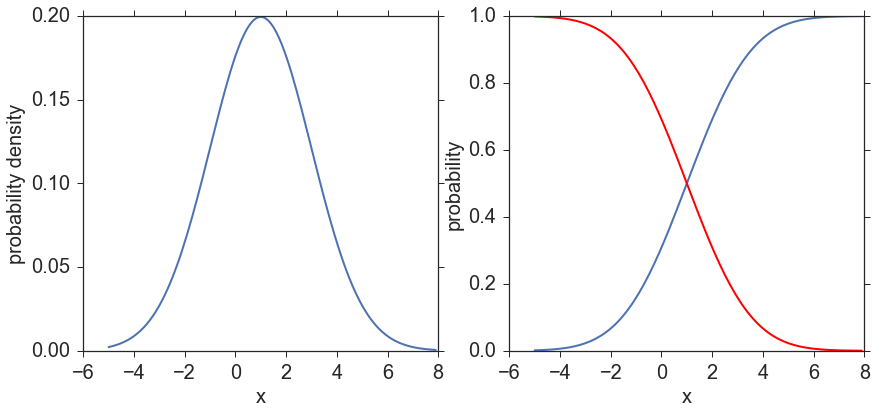

In [26]:
## You can plot the probability density function
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
x = np.arange(-5.0, 8.0, 0.1)
ax1.plot(x, n.pdf(x), lw=2)
## or you can plot the cumulative distribution function:
ax2.plot(x, n.cdf(x), lw=2)
for ax in (ax1,ax2):
    ax.tick_params(labelsize=16)
## we can also look at the survival function: this is just 1 minus the cdf and can be more accurate
## than the cdf in some cases.
ax2.plot(x, n.sf(x), lw=2, color='red')

ax1.set_xlabel("x", fontsize=20)
ax1.set_ylabel("probability density", fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.set_xlabel("x", fontsize=20)
ax2.set_ylabel("probability", fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.show()

We can also use the functions in `scipy.stats` to generate random numbers drawn from that distribution (suffix `rvs` for <i>random variates</i>):

In [27]:
## We generate random numbers:
samp = n.rvs(size=10)
print samp

[-1.97846586  0.54322826  5.73100955  0.04445027  1.5124924   0.3581568
  1.72846217  2.75148437  0.74496201  0.88844211]


### The Poisson distribution with `scipy.stats`

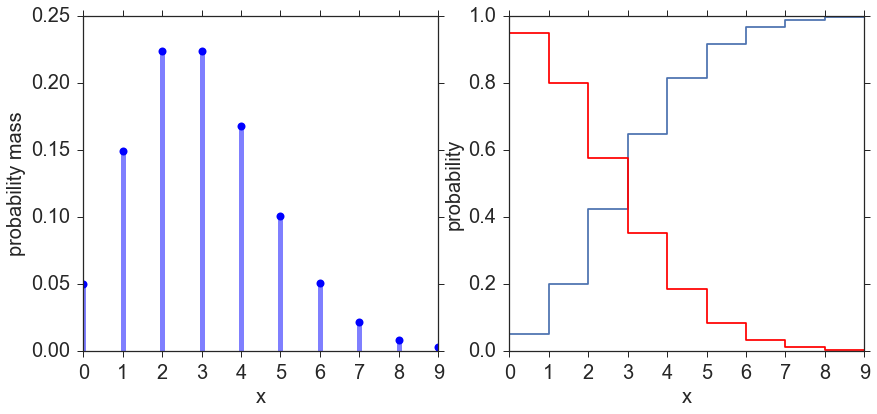

In [28]:
### Poisson distribution
rpar = 3 ## rate parameter for Poisson distribution
## freeze Poisson distribution
p = scipy.stats.poisson(rpar)

## Now plot the distribution function.
## Unlike the normal distribution, the Poisson distribution is discrete
## so it doesn’t have a probability density function, it has a probability mass
## function instead!  Remember this, or try and call p.pdf(x) and see what happens.
## You can plot the pmf using a bar plot similar to what we used for the theoretical binomial distribution.
x = np.arange(0.0, 10.0, 1.0)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.plot(x, p.pmf(x), "bo", ms=8)
ax1.vlines(x, 0, p.pmf(x), colors="b", lw=5, alpha=0.5)

## other methods work in analogy to the continuous distributions, e.g. cdf.
## You can plot this as a continuous smooth line, but what is a better way to display it?

ax2.step(x, p.cdf(x), where='post')
ax2.step(x, p.sf(x), where='post', color='red')

## The position of the steps in the plot is determined by the 'where' parameter which can be set to
## pre, post or mid.  Setting to post puts the transitions at the right place for the cdf.

ax1.set_xlabel("x", fontsize=20)
ax1.set_ylabel("probability mass", fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.set_xlabel("x", fontsize=20)
ax2.set_ylabel("probability", fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

plt.show()

### Inverting the distribution functions: going from a probability to the value in the distribution

Sometimes it is useful to be able to convert a value of the cdf to a corresponding value of a random variable, given a distribution and its parameters.  Most commonly this situation arises if we have a probability or percentile in the distribution and want to know the value of the variable that corresponds to.  To carry out this inversion, `scipy.stats` includes the suffixes to the distribution functions, `ppf` (<i>percent point function</i>) and `isf` (<i>inverse survival function</i>).  

E.g. first consider the following situation:  assume that the heights of adult females in the Netherlands is distributed as a normal distribution with mean (mu) 169 cm and standard deviation (sigma) 7.11 cm.  Dutch gymnast Sanne Wevers is taller than 3.37 per cent of Dutch women.  How tall is she?

In [29]:
## First freeze the distribution:
n = scipy.stats.norm(169.0, 7.11)
## Now return the ppf
print "Sanne Wevers' height is %f cm" % n.ppf(0.0337)

Sanne Wevers' height is 155.995829 cm


Now consider the following:  A radiation alarm measures the counts from a Geiger counter in 1 second intervals.  It is designed so that, if there is an assumed 'normal' background count rate of 2.3 counts per second, it will only trigger (on average) less than once per 6944.44 seconds of operation.  How many counts are required to trigger the alarm?

In [30]:
## First freeze the distribution - the rate parameter is the background rate:
p = scipy.stats.poisson(2.3)
## Here we want the rate which will be exceeded only 1/6944.44 of the time.  The trigger is then equal to
## that rate plus 1
print "The trigger rate is %f counts per second" % (p.isf(1./6944.44)+1)

The trigger rate is 10.000000 counts per second


## Comparing distributions with randomly generated data

### The Poisson distribution

Similarly to the binomial distribution (as shown at the start of the tutorial), we can compare data randomly generated from a Poisson distribution with the predicted distribution:

Probability of 3 events per day: p = 0.125510715083
Probability of <= 3 events per day: p = 0.934357545622


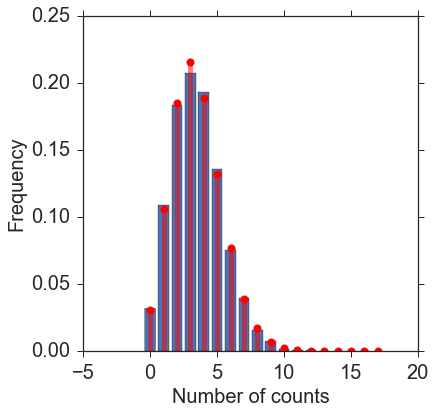

In [31]:
ratepar = 1.5 ## rate parameter for the Poisson distribution
p = scipy.stats.poisson(ratepar) ## freeze distribution
print("Probability of 3 events per day: p = " + str(p.pmf(3)))
print("Probability of <= 3 events per day: p = " + str(p.cdf(3)))

ratepar = 3.5 ## new rate parameter
p = scipy.stats.poisson(ratepar)
randsamp = p.rvs(10000)
x = np.arange(0.0,(np.max(randsamp)*1.5),1.0) ## x-axis
##  Now plot...
fig, ax1 = plt.subplots(1,1,figsize=(6,6))
bins, edges, patches = ax1.hist(randsamp, bins=np.arange(0.0,(np.max(randsamp)*1.5), 1.0), normed=True, 
                                rwidth=0.8, align='left')
ax1.plot(x, p.pmf(x), 'ro', ms=8) ## plot probability mass function for points in x
## For clarity we will plot the theoretical distribution using vertical bars.
ax1.vlines(x, 0, p.pmf(x), colors='r', lw=5, alpha=0.5)
# Here we automatically generate the x axis label to be appropriate for the setup:
ax1.set_xlabel("Number of counts", fontsize=20)
ax1.set_ylabel("Frequency", fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
plt.show()

### The normal distribution

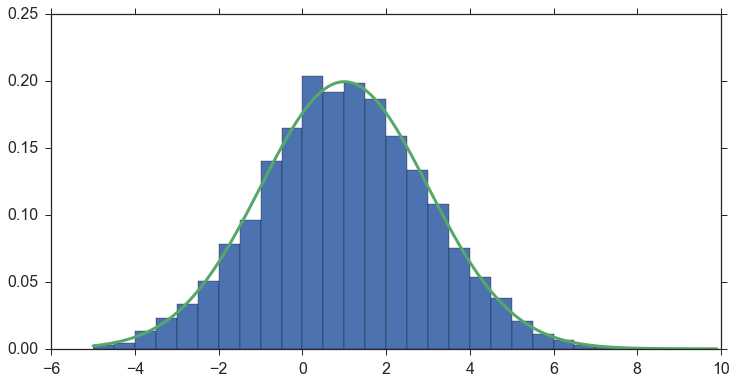

In [32]:
x = np.arange(-5, 10, .1)
mu = 1 ## mean of distribution
sigma = 2 ## standard deviation of the distribution
n = scipy.stats.norm(mu, sigma) ## freeze distribution
randsamp = n.rvs(10000)
fig, ax1 = plt.subplots(1,figsize=(12,6))
bins, edges, patches = ax1.hist(randsamp, bins=np.arange(-5, 10, 0.5), normed=True)
ax1.plot(x, n.pdf(x), lw=3)
ax1.tick_params(labelsize=16)
plt.show()

### The $\chi ^{2}$ distribution

We next play the same game as in the previous subsections, but with the $\chi^{2}$ distribution, which is also continuous. Note that the distribution is `scipy.stats.chi2`. The function `scipy.stats.chisquare` computes a one-way $\chi^{2}$ test, which is something different! Also compare to `numpy.random.chisquare`, which does draw samples from the $\chi^{2}$ distribution.

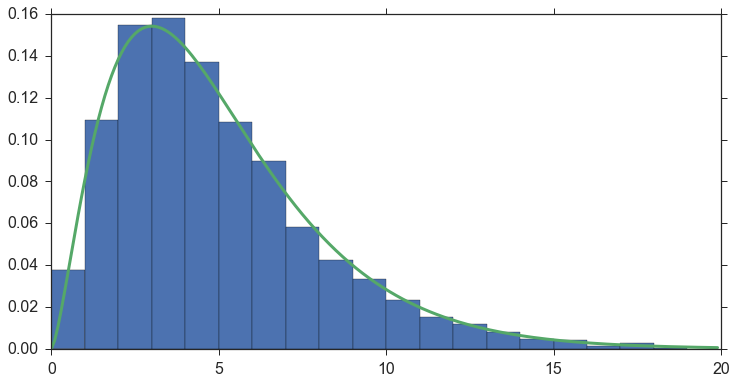

In [33]:
x = np.arange(0, 20, .1)
df = 5 ## degrees of freedom
ch = scipy.stats.chi2(df) ## freeze distribution
randsamp = ch.rvs(5000)
fig, ax1 = plt.subplots(1,figsize=(12,6))
bins, edges, patches = ax1.hist(randsamp, bins=np.arange(0, 20, 1.0), normed=True)
ax1.plot(x, ch.pdf(x), lw=3)
ax1.tick_params(labelsize=16)
plt.show()

### Adding $\chi^{2}$ distributed data

Here we generate two sets of random numbers, each from a different $\chi^{2}$ distribution (with differ-
ent degrees-of-freedom), and look at the sum of the two, which should itself be a $\chi^{2}$ distribution:

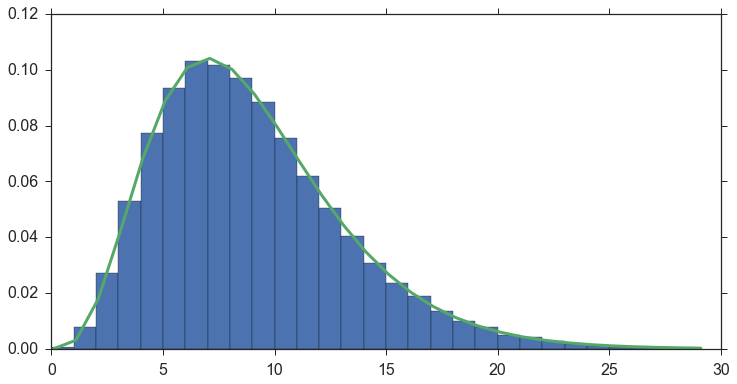

In [34]:
x = np.arange(0.1, 30, 1.)
samp1 = scipy.stats.chi2.rvs(5, size=50000)
samp2 = scipy.stats.chi2.rvs(4, size=50000)
z = samp1 + samp2
fig, ax1 = plt.subplots(1,figsize=(12,6))
bins, edges, patches = ax1.hist(z, bins=np.arange(0, 30, 1.0), normed=True)
c3 = scipy.stats.chi2(9) ## chi-square distribution with 9 (=4+5) degrees of freedom!
ax1.plot(x, c3.pdf(x), lw=3)
ax1.tick_params(labelsize=16)
plt.show()